In [1]:
cd /home/g.samarth/globalHelioseismology/src

/home/g.samarth/globalHelioseismology/src


In [2]:
import globalHelioseismology as GH

In [9]:
GH.spectra.crossSpectra(5, 50, 5, 52, 0)
GH.spectra.crossSpectra(5, 50, 5, 54, 0)
GH.spectra.crossSpectra(5, 51, 5, 53, 0)
GH.spectra.crossSpectra(5, 51, 5, 55, 0)

freqmin = 1960.6661151920289; freqmax = 2252.2663720550563
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_052_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6400.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_052_6400.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6472.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_052_6472.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6544.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_052_6544.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6616.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_052_6616.fits
Storing /scratch/g.samarth/globalHelioseismology/csdata_05/variance_n_05.050-05.052.npy
freqmin = 1959.3801162642978; freqmax = 2280.55834846514
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_054_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6400.fits
Rea

In [14]:
n1, ell1 = 5, 50
n2, ell2 = 5, 54
t = 6
cs = GH.spectra.crossSpectra(n1, ell1, n2, ell2, t)

freqmin = 1959.3801162642978; freqmax = 2280.55834846514
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_054_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6400.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_054_6400.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6472.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_054_6472.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6544.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_054_6544.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6616.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_054_6616.fits
Saving /scratch/g.samarth/globalHelioseismology/csdata_05/csp_data_05.050-05.054_006.npy
Saving /scratch/g.samarth/globalHelioseismology/csdata_05/csm_data_05.050-05.054_006.npy
Saving /scratch/g.samarth/globalHelioseismology/csdata_05/variance_p_05.050-05.054_006.npy
Saving /scratch/g.samarth/globalHelioseismology/csdata_05/varian

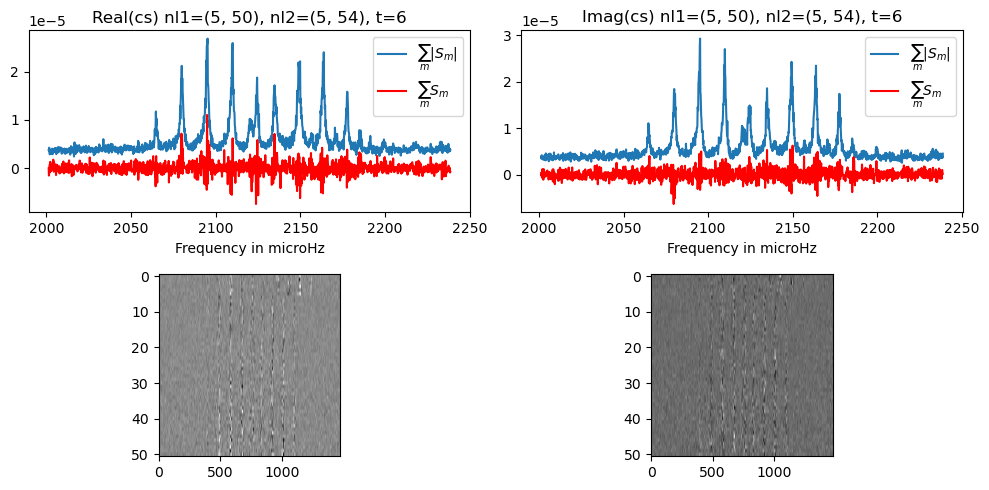

In [15]:
if abs(t)>0:
    suffix = f"{n1:02d}.{ell1:03d}-{n2:02d}.{ell2:03d}_{abs(t):03d}.npy"
else:
    suffix = f"{n1:02d}.{ell1:03d}-{n2:02d}.{ell2:03d}.npy"
csp = np.load(f"/scratch/g.samarth/globalHelioseismology/csdata_{n1:02d}/csp_data_{suffix}")
freqp = cs.freq_p[0]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
axs = axs.flatten()
axs[0].plot(freqp, abs(csp.real).sum(axis=0), label='$\sum_m |S_m|$')
axs[0].plot(freqp, csp.real.sum(axis=0), 'r', label='$\sum_m S_m$')
axs[0].set_xlabel('Frequency in microHz')
axs[0].set_title(f'Real(cs) nl1=({n1}, {ell1}), nl2=({n2}, {ell2}), t={t}')
axs[0].ticklabel_format(axis='y', style='sci', useOffset=False)
axs[0].legend()

axs[1].plot(freqp, abs(csp.imag).sum(axis=0), label='$\sum_m |S_m|$')
axs[1].plot(freqp, csp.imag.sum(axis=0), 'r', label='$\sum_m S_m$')
axs[1].set_xlabel('Frequency in microHz')
axs[1].set_title(f'Imag(cs) nl1=({n1}, {ell1}), nl2=({n2}, {ell2}), t={t}')
axs[1].ticklabel_format(axis='y', style='sci', useOffset=False)
axs[1].legend()

fac = 5.
vmaxr, vminr = csp.real.max()/fac, csp.real.min()/fac
vmaxi, vmini = csp.imag.max()/fac, csp.imag.min()/fac
axs[2].imshow(csp.real, cmap='gray', aspect=csp.shape[1]/csp.shape[0], vmax=vmaxr, vmin=vminr)

axs[3].imshow(csp.imag, cmap='gray', aspect=csp.shape[1]/csp.shape[0], vmax=vmaxi, vmin=vmini)
plt.tight_layout()
plt.show()

In [25]:
dir(axs[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_clipon',
 '_clippath',
 '_colorbars',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',